In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
df = pd.read_csv("cancer_surgeries-california.csv",encoding='cp1252')
df.head()

,year,county,Hospital,OSHPDID,Surgery,# of Cases (ICD 9),# of Cases (ICD 10),LATITUDE,LONGITUDE
0,2013,NaN,Statewide,NaN,COLON,7128.0,NaN,NaN,NaN
1,2013,NaN,Statewide,NaN,BLADDER,892.0,NaN,NaN,NaN
2,2013,NaN,Statewide,NaN,RECTUM,2128.0,NaN,NaN,NaN
3,2013,NaN,Statewide,NaN,BREAST,25829.0,NaN,NaN,NaN
4,2013,NaN,Statewide,NaN,BRAIN,2719.0,NaN,NaN,NaN


## Step-1 Cleansing Data

### Drop Hospital "Statewide" rows as it has got total data of the year which is not required for analysis

In [3]:
df.head(20)

,year,county,Hospital,OSHPDID,Surgery,# of Cases (ICD 9),# of Cases (ICD 10),LATITUDE,LONGITUDE
0,2013,NaN,Statewide,NaN,COLON,7128.0,NaN,NaN,NaN
1,2013,NaN,Statewide,NaN,BLADDER,892.0,NaN,NaN,NaN
2,2013,NaN,Statewide,NaN,RECTUM,2128.0,NaN,NaN,NaN
3,2013,NaN,Statewide,NaN,BREAST,25829.0,NaN,NaN,NaN
4,2013,NaN,Statewide,NaN,BRAIN,2719.0,NaN,NaN,NaN
5,2013,NaN,Statewide,NaN,PANCREAS,819.0,NaN,NaN,NaN
6,2013,NaN,Statewide,NaN,LUNG,3145.0,NaN,NaN,NaN
7,2013,NaN,Statewide,NaN,LIVER,1159.0,NaN,NaN,NaN
8,2013,NaN,Statewide,NaN,ESOPHAGUS,337.0,NaN,NaN,NaN
9,2013,NaN,Statewide,NaN,STOMACH,1010.0,NaN,NaN,NaN


In [4]:
df.isnull().sum()

year                      0
county                   66
Hospital                  0
OSHPDID                  66
Surgery                   0
# of Cases (ICD 9)     6092
# of Cases (ICD 10)    5729
LATITUDE                 73
LONGITUDE                73
dtype: int64

In [5]:
statewideHosp_index = df.index[df['Hospital']=='Statewide'].tolist()

In [6]:
df = df.drop(statewideHosp_index)
df.head()

,year,county,Hospital,OSHPDID,Surgery,# of Cases (ICD 9),# of Cases (ICD 10),LATITUDE,LONGITUDE
11,2013,Alameda,Alameda Hospital,106010735.0,STOMACH,1.0,NaN,37.762953,-122.25362
12,2013,Alameda,Alameda Hospital,106010735.0,COLON,3.0,NaN,37.762953,-122.25362
13,2013,Alameda,Alameda Hospital,106010735.0,BREAST,2.0,NaN,37.762953,-122.25362
14,2013,Alameda,Alta Bates Summit Medical Center – Alta Bates ...,106010739.0,BRAIN,8.0,NaN,37.856330,-122.25784
15,2013,Alameda,Alta Bates Summit Medical Center – Alta Bates ...,106010739.0,COLON,12.0,NaN,37.856330,-122.25784


<AxesSubplot:>

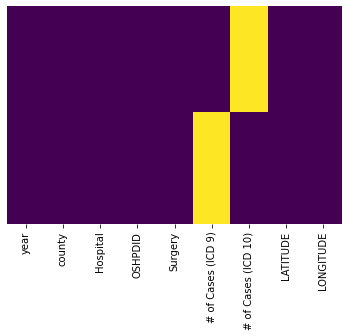

In [7]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

### Making number of cases in ICD9 and ICD10 as 0 wherever null

In [8]:
icd9Index = df.index[df["# of Cases (ICD 9)"].isna()].tolist()
icd10Index = df.index[df["# of Cases (ICD 10)"].isna()].tolist()

In [9]:
for ind in icd9Index:
    df.loc[ind,"# of Cases (ICD 9)"] = 0

In [10]:
for ind in icd10Index:
    df.loc[ind,"# of Cases (ICD 10)"] = 0

<AxesSubplot:>

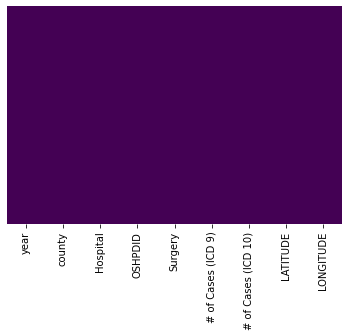

In [11]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [12]:
df.isnull().sum()

year                   0
county                 0
Hospital               0
OSHPDID                0
Surgery                0
# of Cases (ICD 9)     0
# of Cases (ICD 10)    0
LATITUDE               7
LONGITUDE              7
dtype: int64

In [13]:
df[df['LATITUDE'].isnull()]

,year,county,Hospital,OSHPDID,Surgery,# of Cases (ICD 9),# of Cases (ICD 10),LATITUDE,LONGITUDE
6730,2016,Orange,Foothill Regional Medical Center,106301357.0,Breast,0.0,1.0,NaN,NaN
6731,2016,Orange,Foothill Regional Medical Center,106301357.0,Colon,0.0,1.0,NaN,NaN
6732,2016,Orange,Foothill Regional Medical Center,106301357.0,Lung,0.0,1.0,NaN,NaN
6733,2016,Orange,Foothill Regional Medical Center,106301357.0,Pancreas,0.0,1.0,NaN,NaN
6734,2016,Orange,Foothill Regional Medical Center,106301357.0,Rectum,0.0,1.0,NaN,NaN
8797,2017,Orange,Foothill Regional Medical Center,106301357.0,Colon,0.0,6.0,NaN,NaN
8798,2017,Orange,Foothill Regional Medical Center,106301357.0,Rectum,0.0,2.0,NaN,NaN


In [14]:
latIndex = df.index[df['LATITUDE'].isnull()].tolist()
for ind in latIndex:
    df.loc[ind,"LATITUDE"] = 0
    df.loc[ind,"LONGITUDE"] = 0
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11755 entries, 11 to 11820
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 11755 non-null  int64  
 1   county               11755 non-null  object 
 2   Hospital             11755 non-null  object 
 3   OSHPDID              11755 non-null  float64
 4   Surgery              11755 non-null  object 
 5   # of Cases (ICD 9)   11755 non-null  float64
 6   # of Cases (ICD 10)  11755 non-null  float64
 7   LATITUDE             11755 non-null  float64
 8   LONGITUDE            11755 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.1+ MB


In [15]:
df[df['LATITUDE'].isnull()]

,year,county,Hospital,OSHPDID,Surgery,# of Cases (ICD 9),# of Cases (ICD 10),LATITUDE,LONGITUDE


## Step-2 Plotting graphs

In [16]:
df.head()

,year,county,Hospital,OSHPDID,Surgery,# of Cases (ICD 9),# of Cases (ICD 10),LATITUDE,LONGITUDE
11,2013,Alameda,Alameda Hospital,106010735.0,STOMACH,1.0,0.0,37.762953,-122.25362
12,2013,Alameda,Alameda Hospital,106010735.0,COLON,3.0,0.0,37.762953,-122.25362
13,2013,Alameda,Alameda Hospital,106010735.0,BREAST,2.0,0.0,37.762953,-122.25362
14,2013,Alameda,Alta Bates Summit Medical Center – Alta Bates ...,106010739.0,BRAIN,8.0,0.0,37.856330,-122.25784
15,2013,Alameda,Alta Bates Summit Medical Center – Alta Bates ...,106010739.0,COLON,12.0,0.0,37.856330,-122.25784


## 1. Plotting countplot to show number of different surgeries conducted in the year 2018

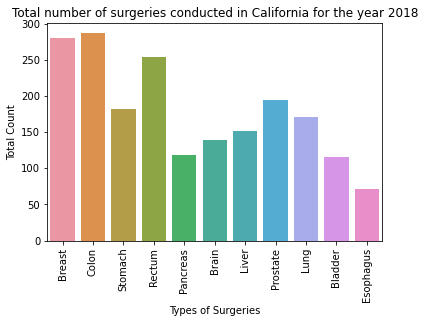

In [17]:
ax = sns.countplot(x="Surgery", data=df[df['year']== 2018])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Total number of surgeries conducted in California for the year 2018")
plt.xlabel("Types of Surgeries")
plt.ylabel("Total Count")
plt.show()

## 2. Plotting Histogram to see the skewness of the ICD-9 patients
It can be seen that the graph is positively skewed, meaning the data is spread out.

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='# of Cases (ICD 9)', ylabel='Density'>

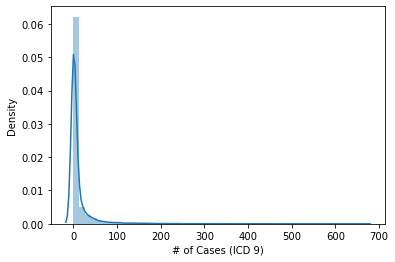

In [57]:
sns.distplot(df["# of Cases (ICD 9)"])

In [19]:
df.describe()

,year,OSHPDID,# of Cases (ICD 9),# of Cases (ICD 10),LATITUDE,LONGITUDE
count,11755.000000,1.175500e+04,11755.000000,11755.000000,11755.000000,11755.000000
mean,2015.524117,1.062823e+08,12.049851,14.544024,35.609457,-119.481126
std,1.709752,1.347787e+05,37.765635,45.706110,2.304801,3.547872
min,2013.000000,1.060107e+08,0.000000,0.000000,0.000000,-124.195140
25%,2014.000000,1.061904e+08,0.000000,0.000000,33.949170,-121.776854
50%,2016.000000,1.063013e+08,0.000000,1.000000,34.274589,-118.486230
75%,2017.000000,1.063713e+08,7.000000,8.000000,37.747990,-117.955240
max,2018.000000,1.065810e+08,662.000000,755.000000,41.772780,0.000000


## 3. Plotting a Box Plot to show the number of ICD-9 patients admitted for different surgeries in the year 2015 and the outlier

In [20]:
df_2015 = df[df['year']== 2015]
df_2015.head()

,year,county,Hospital,OSHPDID,Surgery,# of Cases (ICD 9),# of Cases (ICD 10),LATITUDE,LONGITUDE
3940,2015,Alameda,Alameda Hospital,106010735.0,COLON,4.0,0.0,37.762953,-122.25362
3941,2015,Alameda,Alameda Hospital,106010735.0,BREAST,3.0,0.0,37.762953,-122.25362
3942,2015,Alameda,Alameda Hospital,106010735.0,RECTUM,1.0,0.0,37.762953,-122.25362
3943,2015,Alameda,Alta Bates Summit Medical Center – Alta Bates ...,106010739.0,COLON,8.0,0.0,37.856330,-122.25784
3944,2015,Alameda,Alta Bates Summit Medical Center – Alta Bates ...,106010739.0,BRAIN,3.0,0.0,37.856330,-122.25784


<AxesSubplot:xlabel='# of Cases (ICD 9)', ylabel='Surgery'>

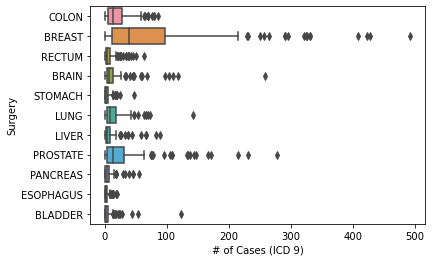

In [21]:
sns.boxplot(x= df_2015['# of Cases (ICD 9)'], y = df_2015['Surgery'])

In [22]:
df_2015.groupby('Surgery').sum()

,year,OSHPDID,# of Cases (ICD 9),# of Cases (ICD 10),LATITUDE,LONGITUDE
Surgery,,,,,,
BLADDER,203515,1.073618e+10,677.0,0.0,3598.040496,-12075.161590
BRAIN,276055,1.456188e+10,2111.0,0.0,4834.569795,-16345.053132
BREAST,576290,3.039692e+10,19914.0,0.0,10257.733795,-34230.990339
COLON,574275,3.029064e+10,5456.0,0.0,10214.526204,-34105.821907
ESOPHAGUS,130975,6.908340e+09,264.0,0.0,2316.376680,-7782.184568
LIVER,185380,9.777428e+09,952.0,0.0,3248.912414,-10981.620753
LUNG,366730,1.934349e+10,2508.0,0.0,6490.271343,-21772.626959
PANCREAS,189410,9.990349e+09,656.0,0.0,3316.032610,-11225.655991
PROSTATE,298220,1.572883e+10,4474.0,0.0,5247.025579,-17656.321583


## 4. Plotting a pie chart to show Bladder surgery in the year 2013 for certain countries of California

In [23]:
df_bladderCase = df[(df['Surgery'] == 'BLADDER') & (df['year'] == 2013)]

In [24]:
df_bladderCase = df_bladderCase.groupby('county').sum()

In [25]:
df_bladderCase['Countries'] = df_bladderCase.index

In [26]:
df_bladderCase1 = df_bladderCase[:5]

In [27]:
df_bladderCase1

,year,OSHPDID,# of Cases (ICD 9),# of Cases (ICD 10),LATITUDE,LONGITUDE,Countries
county,,,,,,,
Alameda,8052,424046914.0,32.0,0.0,150.781467,-488.528325,Alameda
Butte,2013,106040962.0,4.0,0.0,39.742240,-121.849220,Butte
Contra Costa,10065,530357913.0,10.0,0.0,189.693625,-610.021024,Contra Costa
Fresno,6039,318304784.0,5.0,0.0,110.422440,-359.227160,Fresno
Humboldt,2013,106121080.0,4.0,0.0,40.783200,-124.142160,Humboldt


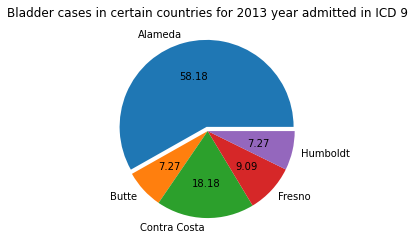

In [28]:
e = [0.05,0,0,0,0]
plt.pie(df_bladderCase1['# of Cases (ICD 9)'],labels=df_bladderCase1['Countries'],explode=e, autopct="%.2f")
plt.title("Bladder cases in certain countries for 2013 year admitted in ICD 9")
plt.show()

In [29]:
df_2015['Surgery'].value_counts()

BREAST       286
COLON        285
RECTUM       227
LUNG         182
STOMACH      172
PROSTATE     148
BRAIN        137
BLADDER      101
PANCREAS      94
LIVER         92
ESOPHAGUS     65
Name: Surgery, dtype: int64

## 5. Plotting a bar chart to show count of Surgeries conducted in the year 2015 - California

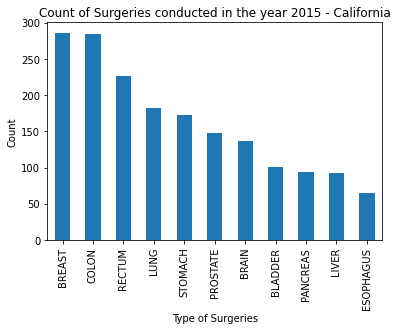

In [60]:
df_2015['Surgery'].value_counts().plot.bar()
plt.title("Count of Surgeries conducted in the year 2015 - California")
plt.xlabel("Type of Surgeries")
plt.ylabel("Count")
plt.show()